In [ ]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.metrics import roc_curve, auc

In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from fastai.vision.all import cnn_learner, RandTransform, ImageDataLoaders, ClassificationInterpretation, models
from fastai.metrics import error_rate, accuracy

In [ ]:
image_directory = '/content/drive/MyDrive/LC25000/'

In [ ]:
data = ImageDataLoaders.from_folder(image_directory, train='train', valid='val', size=224, bs=16, num_workers=8)

In [ ]:
print(len(data.train_ds), len(data.valid_ds))


11250 2270


In [ ]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
learn = cnn_learner(data, models.vgg11, metrics = [accuracy])

In [ ]:
learn.summary()

Sequential (Input shape: 16 x 3 x 768 x 768)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 768 x 768 
Conv2d                                    1792       False     
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 384 x 384 
MaxPool2d                                                      
____________________________________________________________________________
                     16 x 128 x 384 x 38 
Conv2d                                    73856      False     
ReLU                                                           
____________________________________________________________________________
                     16 x 128 x 192 x 19 
MaxPool2d                                                      
____________________________________________________________________________
                     16 x 256 x

In [ ]:
learn.unfreeze()

SuggestedLRs(valley=0.0008317637839354575)

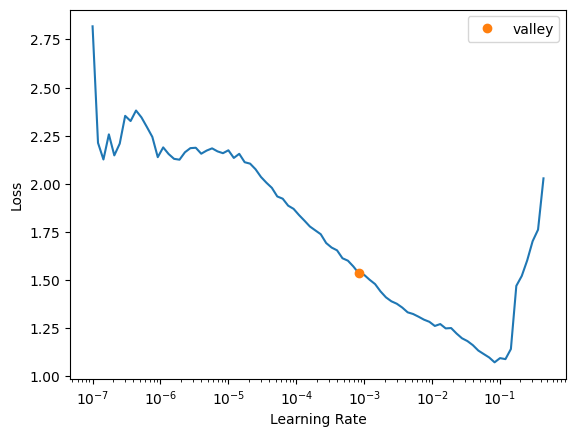

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5,lr_max=0.00083)

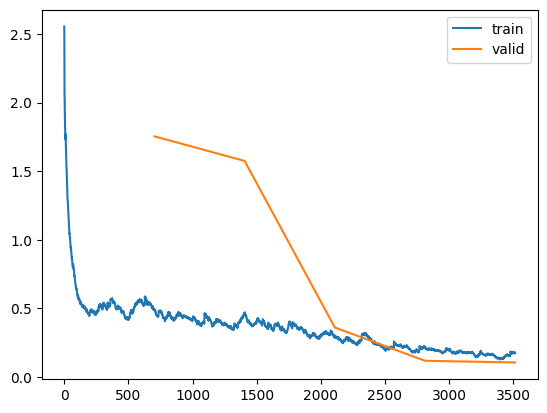

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
learn.save('/content/drive/MyDrive/LC25000/models/lung_cancer_classifier')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

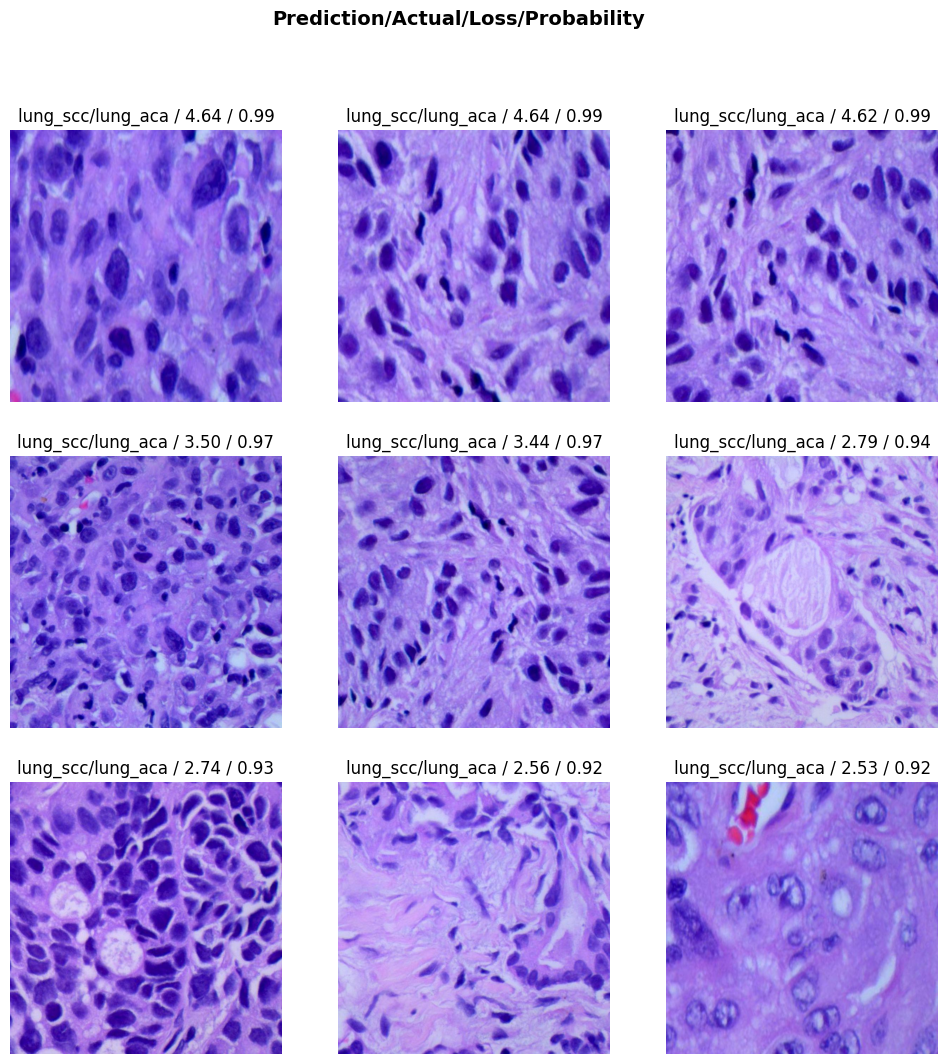

In [ ]:
interp.plot_top_losses(9, figsize=(12,12))

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [ ]:
interp.print_classification_report()

In [ ]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

In [ ]:
# probs from preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")